In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'pandas'

In [6]:
!pip install wordcloud

In [19]:
df = pd.read_csv("spotify_millsongdata.csv")
df.shape

(57650, 4)

In [12]:
df.columns

Index(['artist', 'song', 'link', 'text'], dtype='object')

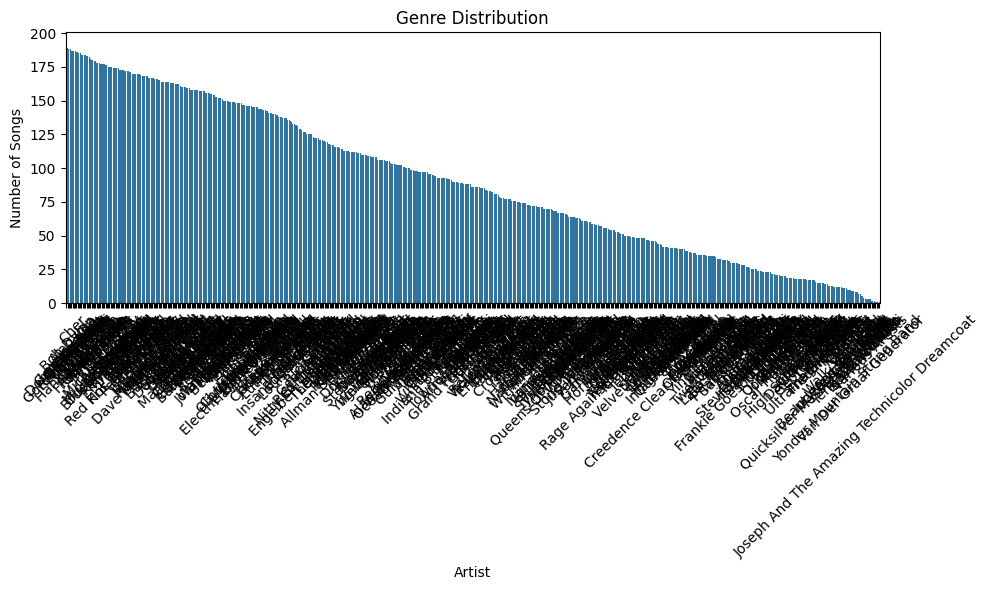

In [10]:
genre_counts = df['artist'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.title('Genre Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

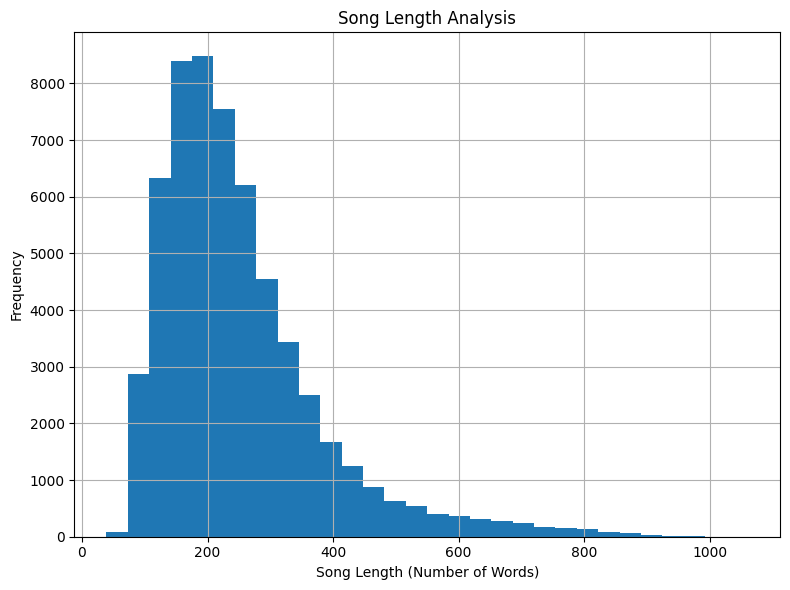

In [13]:
# Song Length Analysis - Histogram
df['song_length'] = df['text'].apply(lambda x: len(word_tokenize(x)))
plt.figure(figsize=(8, 6))
plt.hist(df['song_length'], bins=30)
plt.xlabel('Song Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Song Length Analysis')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/udaym/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/udaym/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/udaym/nltk_data...


True

In [22]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Convert lyrics to lowercase
df['lyrics'] = df['text'].str.lower()

# Define a function for text cleaning, removing special symbols
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove special characters
    text = text.replace('\r', ' ').replace('\n', ' ')
    # Remove digits
    text = ''.join([i for i in text if not i.isdigit()])
    return text

# Apply text cleaning to the lyrics column
df['lyrics'] = df['lyrics'].apply(clean_text)

# Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function for tokenization, removing stopwords, and lemmatization
def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return ' '.join(lemmatized_tokens)

# Apply preprocessing to the lyrics column
df['clean_lyrics'] = df['lyrics'].apply(preprocess_text)


# Display the cleaned lyrics column
df[['text', 'clean_lyrics']].head()


,text,clean_lyrics
0,"Look at her face, it's a wonderful face \r\nA...",look face wonderful face mean something specia...
1,"Take it easy with me, please \r\nTouch me gen...",take easy please touch gently like summer even...
2,I'll never know why I had to go \r\nWhy I had...,ill never know go put lousy rotten show boy to...
3,Making somebody happy is a question of give an...,making somebody happy question give take learn...
4,Making somebody happy is a question of give an...,making somebody happy question give take learn...


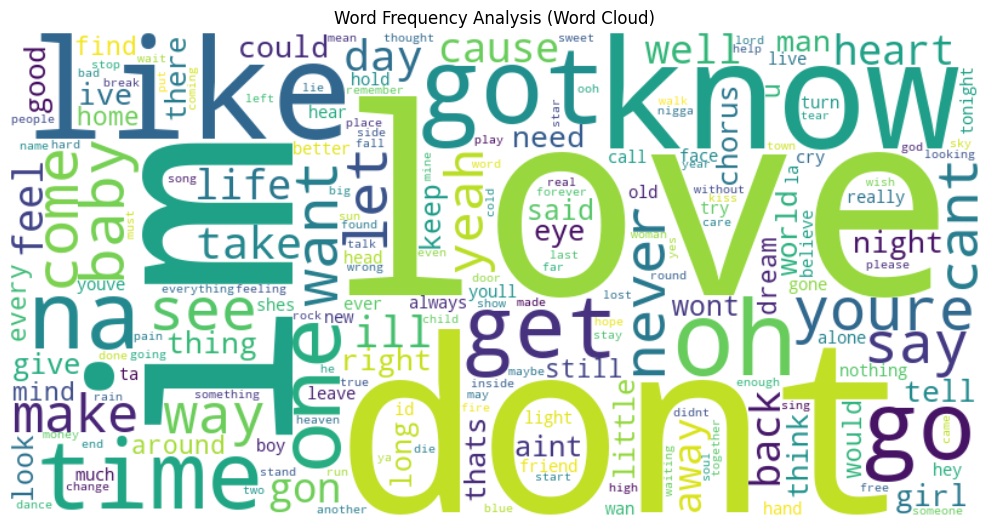

In [23]:
# Word Frequency Analysis - Word cloud
all_lyrics = ' '.join(df['clean_lyrics'])
word_freq = FreqDist(word_tokenize(all_lyrics))
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Frequency Analysis (Word Cloud)')
plt.tight_layout()
plt.show()

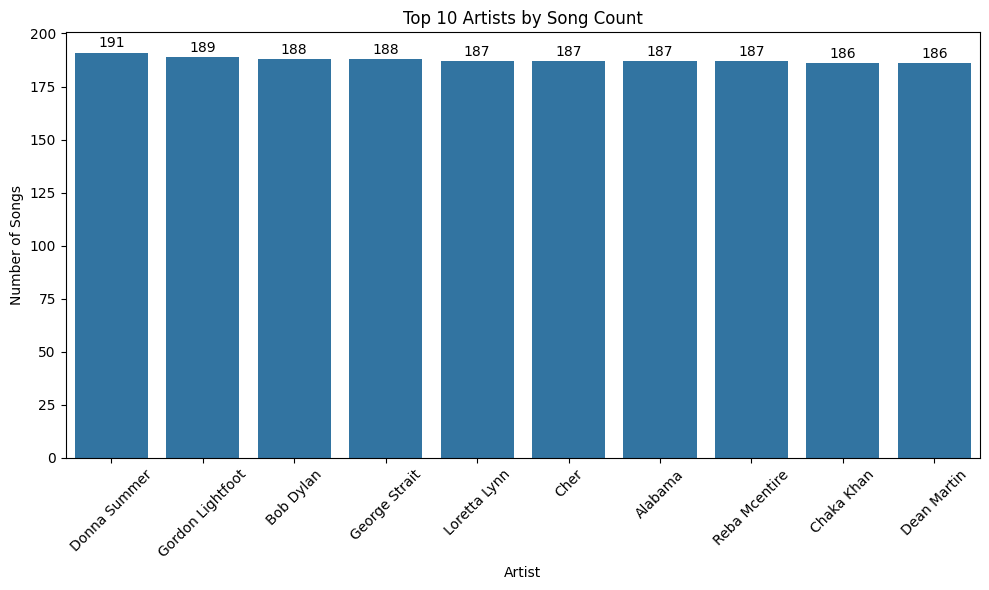

In [25]:
# Artist Popularity - Bar chart with labels
artist_counts = df['artist'].value_counts().head(10)  # Top 10 artists by song count
plt.figure(figsize=(10, 6))
sns.barplot(x=artist_counts.index, y=artist_counts.values)
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.title('Top 10 Artists by Song Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels to the bars
for i, count in enumerate(artist_counts.values):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()
